In [2]:
%matplotlib inline
import numpy as np
from numpy import loadtxt
from lmfit.models import ExponentialModel, ConstantModel
import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages


In [3]:
def red(time):
    '''
    This should eliminate the issue of the weird time jump about 2/3 of way through collection also that t=0 if 0 counts
    '''
    return np.arange(0,len(time))
def hours(secs,counts):
    import numpy
    hours=numpy.arange(0,secs[len(secs)-1]//3600+1)
    binned_counts=[0]*len(hours)
    for i in range(0,len(secs)):
        index=i//3600
        binned_counts[index]+=counts[i]
    return hours,binned_counts
def sin(x, amp,omega,shift,y0):
    """ model decaying sine wave, subtract data"""
    return amp * np.sin(x * omega + shift)+y0
def doFit(hour_time,binned_counts):
    from lmfit import Model
    gmod = Model(sin)
    params = gmod.make_params(amp=50, omega=.26,shift=0,y0=18800)
    params.add('omega',value=2*np.pi/24,vary=False)
    params.add('y0',value=np.average(binned_counts))
    result = gmod.fit(binned_counts,params,x=hour_time,weights=1/np.sqrt(binned_counts))

    print(result.fit_report())
    result.plot(fig_kws={'figsize':(10,10)})
    return result
def doFit2(time,rates):
    time,rates = filter(time,rates)
    hour_time,binned_counts=hours(red(time),rate)
    length = len(binned_counts)
    while binned_counts[length-1]<binned_counts[length-2]*.9:
        hour_time=hour_time[:-1]
        binned_counts=binned_counts[:-1]
        length = len(binned_counts)
        
    from lmfit import Model
    gmod = Model(sin)
    params = gmod.make_params(amp=50, omega=.26,shift=0,y0=18800)
    params.add('omega',value=2*np.pi/24,vary=False)
    params.add('y0',value=np.average(binned_counts))
    result = gmod.fit(binned_counts,params,x=hour_time,weights=1/np.sqrt(binned_counts))

    print(result.fit_report())
    result.plot(fig_kws={'figsize':(10,10)})
    return result,hour_time,binned_counts
def filter(time,rate):
    returnTime=[]
    returnRate=[]
    for i in range(len(time)):
        if time[i]!=0 and rate[i] == 0:
            continue
        else:
            returnTime.append(time[i])
            returnRate.append(rate[i])
    return returnTime,returnRate

[[Model]]
    Model(sin)
[[Fit Statistics]]
    # function evals   = 28
    # data points      = 38
    # variables        = 3
    chi-square         = 41.506
    reduced chi-square = 1.186
[[Variables]]
    amp:     95.3160251 +/- 35.24721 (36.98%) (init= 50)
    omega:   0.2617994 (fixed)
    shift:  -1.36886102 +/- 0.398203 (29.09%) (init= 0)
    y0:      20499.5272 +/- 26.36554 (0.13%) (init= 20506.68)
[[Correlations]] (unreported correlations are <  0.100)
    C(shift, y0)                 = -0.270 



(<lmfit.model.ModelResult at 0x7f1ae1e89dd8>,
 array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37]),
 [20231.0,
  20583.0,
  20098.0,
  20409.0,
  20127.0,
  20478.0,
  20528.0,
  20633.0,
  20581.0,
  20713.0,
  20628.0,
  20468.0,
  20625.0,
  20441.0,
  20726.0,
  20707.0,
  20574.0,
  20385.0,
  20741.0,
  20534.0,
  20466.0,
  20135.0,
  20346.0,
  20372.0,
  20373.0,
  20581.0,
  20580.0,
  20838.0,
  20510.0,
  20662.0,
  20572.0,
  20514.0,
  20455.0,
  20519.0,
  20560.0,
  20532.0,
  20495.0,
  20534.0])

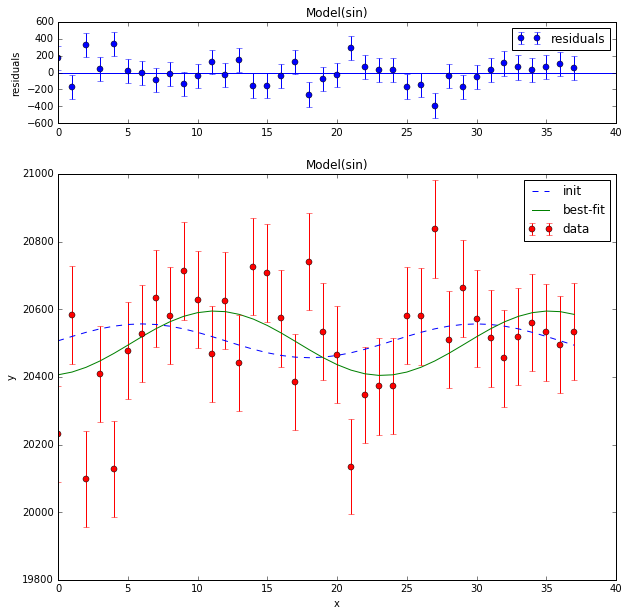

In [4]:
time, rate = np.loadtxt('Data/Luke_Ian/Luke_Perry_IanRate2015_12_08-13-33.txt', unpack=True)
doFit2(time,rate)

[[Model]]
    Model(sin)
[[Fit Statistics]]
    # function evals   = 34
    # data points      = 36
    # variables        = 3
    chi-square         = 61.458
    reduced chi-square = 1.862
[[Variables]]
    amp:     1182.12671 +/- 121.8304 (10.31%) (init= 50)
    omega:   0.2617994 (fixed)
    shift:   1.12308241 +/- 0.105020 (9.35%) (init= 0)
    y0:      1.3927e+05 +/- 88.96609 (0.06%) (init= 139410.6)
[[Correlations]] (unreported correlations are <  0.100)
    C(shift, y0)                 =  0.255 
    C(amp, y0)                   = -0.164 



(<lmfit.model.ModelResult at 0x7f1b040dcb70>,
 array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35]),
 [140086.0,
  139561.0,
  139401.0,
  140245.0,
  140304.0,
  140289.0,
  139776.0,
  139306.0,
  139646.0,
  138902.0,
  139052.0,
  138707.0,
  138538.0,
  137997.0,
  138268.0,
  138549.0,
  138549.0,
  138705.0,
  139020.0,
  137998.0,
  139200.0,
  139383.0,
  139734.0,
  141252.0,
  140970.0,
  140575.0,
  140645.0,
  140897.0,
  140975.0,
  140714.0,
  139344.0,
  139011.0,
  138973.0,
  138361.0,
  137945.0,
  137903.0])

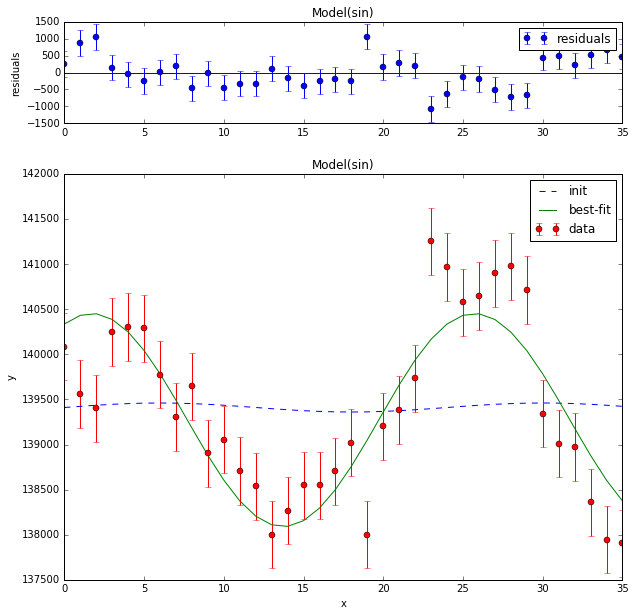

In [5]:
time, rate = np.loadtxt('Data/Luke_Ian/Luke_Perry_IanRate2015_12_03-13-02.txt', unpack=True)
doFit2(time,rate)

[[Model]]
    Model(sin)
[[Fit Statistics]]
    # function evals   = 29
    # data points      = 46
    # variables        = 3
    chi-square         = 293.633
    reduced chi-square = 6.829
[[Variables]]
    amp:     632.741572 +/- 186.8383 (29.53%) (init= 50)
    omega:   0.2617994 (fixed)
    shift:  -1.13140260 +/- 0.282549 (24.97%) (init= 0)
    y0:      1.1216e+05 +/- 129.2726 (0.12%) (init= 112196.9)
[[Correlations]] (unreported correlations are <  0.100)



(<lmfit.model.ModelResult at 0x7f1ade221d30>,
 array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45]),
 [114086.0,
  113713.0,
  112585.0,
  112438.0,
  112992.0,
  112991.0,
  112367.0,
  112761.0,
  113026.0,
  113972.0,
  114021.0,
  113236.0,
  113245.0,
  113421.0,
  113192.0,
  113248.0,
  112747.0,
  113284.0,
  112311.0,
  111609.0,
  111679.0,
  111469.0,
  111623.0,
  110788.0,
  111338.0,
  111261.0,
  110961.0,
  111279.0,
  110906.0,
  111670.0,
  111454.0,
  111418.0,
  111918.0,
  111530.0,
  112364.0,
  112940.0,
  112217.0,
  112581.0,
  111816.0,
  111743.0,
  111665.0,
  110916.0,
  111248.0,
  111585.0,
  110649.0,
  110796.0])

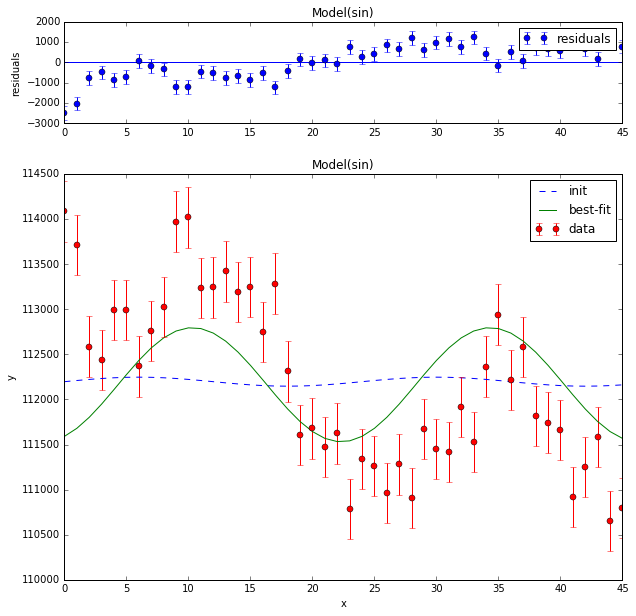

In [6]:
time,rate = np.loadtxt('Data/Corina_Ian_Thres208mVRate2015_11_05-13-33.txt', unpack=True)
doFit2(time,rate)

[[Model]]
    Model(sin)
[[Fit Statistics]]
    # function evals   = 27
    # data points      = 83
    # variables        = 3
    chi-square         = 172.274
    reduced chi-square = 2.153
[[Variables]]
    amp:    -24.3036239 +/- 31.37888 (129.11%) (init= 50)
    omega:   0.2617994 (fixed)
    shift:  -0.71871222 +/- 1.290198 (179.52%) (init= 0)
    y0:      18802.7045 +/- 22.27263 (0.12%) (init= 18803.54)
[[Correlations]] (unreported correlations are <  0.100)
    C(shift, y0)                 =  0.107 



(<lmfit.model.ModelResult at 0x7f1b040d5d30>,
 array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
        68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82]),
 [18813.0,
  18797.0,
  18674.0,
  18718.0,
  18789.0,
  18859.0,
  18892.0,
  18928.0,
  18984.0,
  19136.0,
  18706.0,
  18928.0,
  18940.0,
  19155.0,
  18917.0,
  18949.0,
  19026.0,
  18814.0,
  19037.0,
  18908.0,
  19213.0,
  18882.0,
  18998.0,
  18911.0,
  19166.0,
  18963.0,
  18887.0,
  19133.0,
  18897.0,
  18907.0,
  18660.0,
  18794.0,
  18847.0,
  18630.0,
  18773.0,
  18882.0,
  19241.0,
  19048.0,
  18917.0,
  18889.0,
  19057.0,
  18664.0,
  18853.0,
  18762.0,
  18921.0,
  18997.0,
  18587.0,
  18851.0,
  18789.0,
  18993.0,
  18875.0,
  19148.0,
  18804.

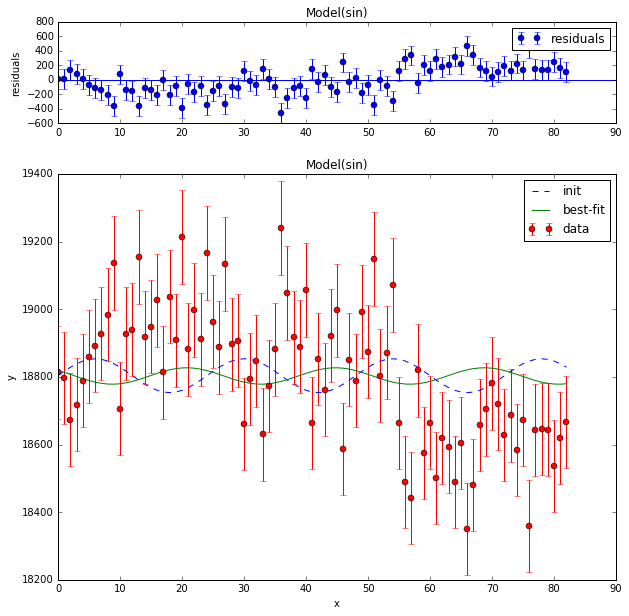

In [7]:
time,rate = np.loadtxt('Data/Corina_Ian_Thres400mVRate2015_11_09-01-48.txt', unpack=True)
doFit2(time,rate)

# Temperature Stuff

In [8]:
time_temp,temp = np.loadtxt('Data/tempData.txt',unpack=True)

In [9]:
#fname = 'Data/tempData.txt'
fname = 'Data/foo.txt'
f = open(fname)
f.readline()
days_hours=[]
days_temp =[]
#for i in range(564180//3600-1):
for i in range(24*3):   
    temp = np.empty([1])
    startDay = i
    endDay   = i+1
    print('hour: '+str(i))
    for i in range(3600*48*startDay,3600*48*endDay):
        line = f.readline()
        if line=='':
            continue

        if len(line.split('\t'))==2:
            temp = np.append(temp,float(line.split('\t')[1]))
    temp_hours,temp_red =hours(red(temp),temp)
    days_hours.append(temp_hours[:-1])
    days_temp.append(temp_red[:-1])
#print(temp)



hour: 0
hour: 1
hour: 2
hour: 3
hour: 4
hour: 5
hour: 6
hour: 7
hour: 8
hour: 9
hour: 10
hour: 11
hour: 12
hour: 13
hour: 14
hour: 15
hour: 16
hour: 17
hour: 18
hour: 19
hour: 20
hour: 21
hour: 22
hour: 23
hour: 24
hour: 25
hour: 26
hour: 27
hour: 28
hour: 29
hour: 30
hour: 31
hour: 32
hour: 33
hour: 34
hour: 35
hour: 36
hour: 37
hour: 38
hour: 39
hour: 40
hour: 41
hour: 42
hour: 43
hour: 44
hour: 45
hour: 46
hour: 47
hour: 48
hour: 49
hour: 50
hour: 51
hour: 52
hour: 53
hour: 54
hour: 55
hour: 56
hour: 57
hour: 58
hour: 59
hour: 60
hour: 61
hour: 62
hour: 63
hour: 64
hour: 65
hour: 66
hour: 67
hour: 68
hour: 69
hour: 70
hour: 71


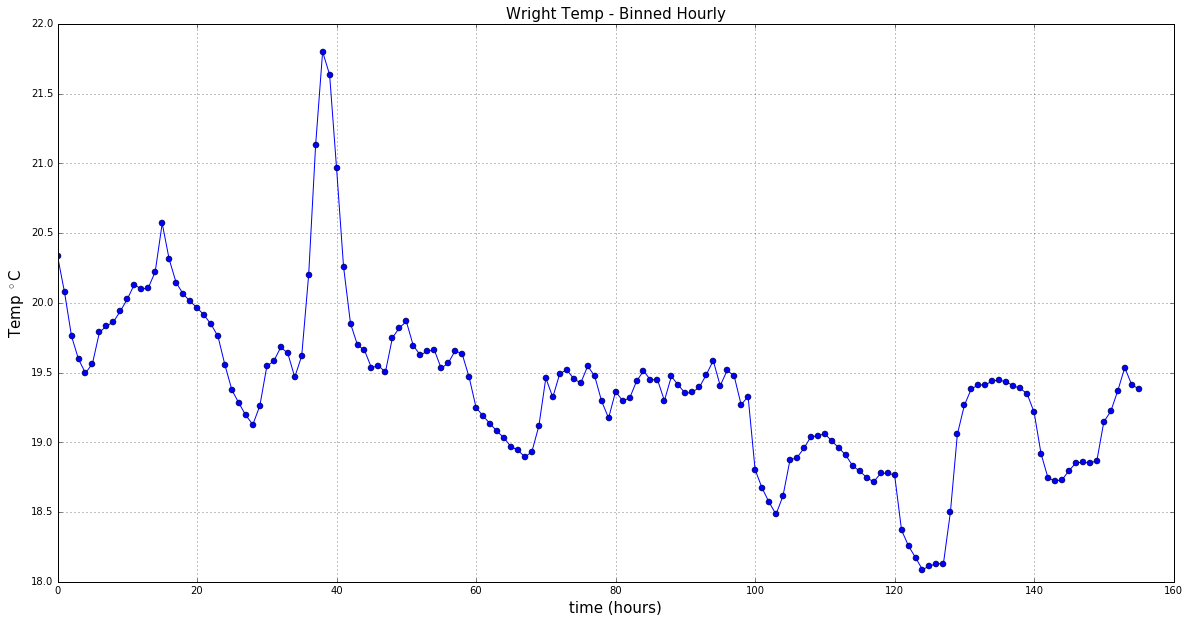

In [10]:
total_temp = []
total_hour = []
for i in range(len(days_temp)):
    for j in range(len(days_temp[i])):
        total_temp.append(days_temp[i][j])
        total_hour.append(days_hours[i][j])
        #print(days_hours[i][j])
total_temp=np.array(total_temp)/3600
total_hour=np.arange(len(total_temp))
plt.figure(figsize=(20,10))
plt.plot(total_hour,total_temp,'-o')

plt.ylabel('Temp '+r'$^\circ$'+'C',fontsize=15)
plt.xlabel('time (hours)',fontsize=15)
plt.title('Wright Temp - Binned Hourly',fontsize=15)
plt.grid()
plt.show()

[[Model]]
    Model(sin)
[[Fit Statistics]]
    # function evals   = 34
    # data points      = 36
    # variables        = 3
    chi-square         = 61.458
    reduced chi-square = 1.862
[[Variables]]
    amp:     1182.12671 +/- 121.8304 (10.31%) (init= 50)
    omega:   0.2617994 (fixed)
    shift:   1.12308241 +/- 0.105020 (9.35%) (init= 0)
    y0:      1.3927e+05 +/- 88.96609 (0.06%) (init= 139410.6)
[[Correlations]] (unreported correlations are <  0.100)
    C(shift, y0)                 =  0.255 
    C(amp, y0)                   = -0.164 

[[Model]]
    Model(sin)
[[Fit Statistics]]
    # function evals   = 28
    # data points      = 38
    # variables        = 3
    chi-square         = 41.506
    reduced chi-square = 1.186
[[Variables]]
    amp:     95.3160251 +/- 35.24721 (36.98%) (init= 50)
    omega:   0.2617994 (fixed)
    shift:  -1.36886102 +/- 0.398203 (29.09%) (init= 0)
    y0:      20499.5272 +/- 26.36554 (0.13%) (init= 20506.68)
[[Correlations]] (unreported correlati

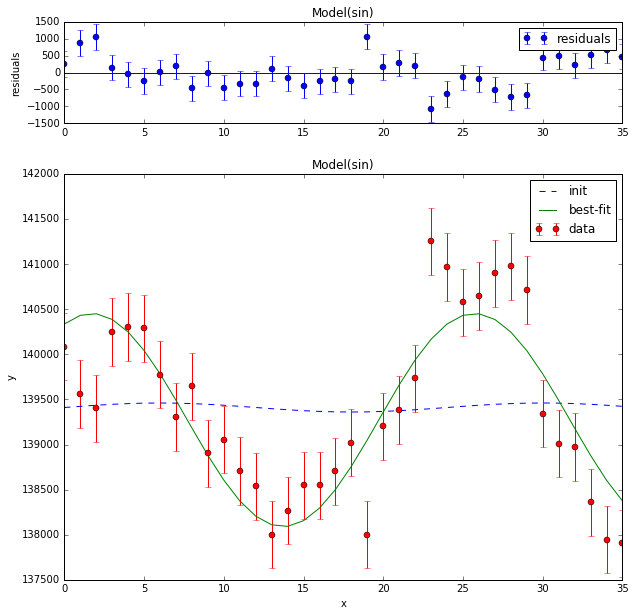

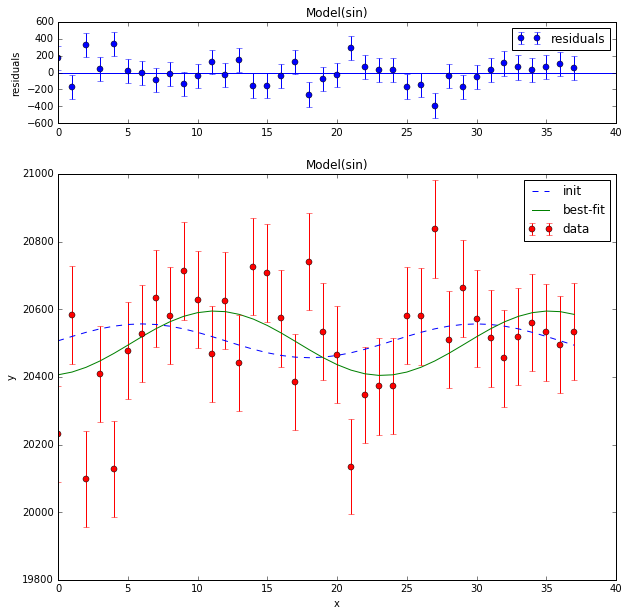

In [11]:
time, rate = np.loadtxt('Data/Luke_Ian/Luke_Perry_IanRate2015_12_03-13-02.txt', unpack=True)
out,hour_time,binned_counts=doFit2(time,rate)
time, rate = np.loadtxt('Data/Luke_Ian/Luke_Perry_IanRate2015_12_08-13-33.txt', unpack=True)
out_8,hour_time_8,binned_counts_8 = doFit2(time,rate)

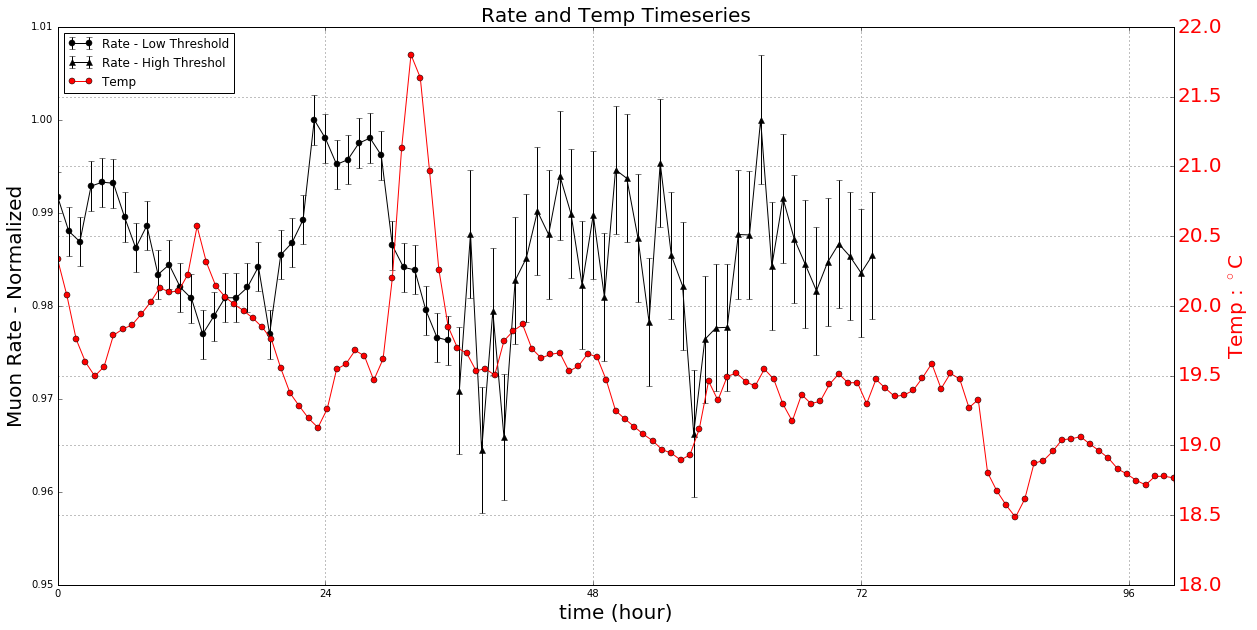

In [19]:
fig, ax1 = plt.subplots(figsize=(20,10))
fontSize=20
ax1.errorbar(hour_time,cor_counts, fmt='k-o',yerr=yerr1,label="Rate - Low Threshold")
ax1.errorbar(hour_time_8+36,cor_counts_8, fmt='k^-',yerr=yerr8,label="Rate - High Threshol")
ax1.set_xlabel('time (hour)',fontsize=fontSize)
# Make the y-axis label and tick labels match the line color.
ax1.set_ylabel('Muon Rate - Normalized',fontsize=fontSize)
for tl in ax1.get_yticklabels():
    tl.set_color('k')
ax1.set_xlim([0,100])
ax1.legend()
ax2 = ax1.twinx()
ax2.plot(total_hour, total_temp, 'r-o',label='Temp')
ax2.set_ylabel('Temp '+r': $^\circ$'+'C',fontsize=fontSize,color='r')
ax2.tick_params(axis='y', labelsize=fontSize)


for tl in ax2.get_yticklabels():
    tl.set_color('r')
ax2.set_xlim([0,100])
h1, l1 = ax1.get_legend_handles_labels()
h2, l2 = ax2.get_legend_handles_labels()
ax1.legend(h1+h2, l1+l2, loc=2)
ax1.xaxis.grid()
ax2.grid()
plt.xticks(np.arange(0, 126+1, 24))
plt.title('Rate and Temp Timeseries',fontsize=fontSize)
plt.show()

In [ ]:
plt.subplots_adjust(hspace=0,wspace=0.)
plt.figure(figsize=(20,10))
ax1=plt.subplot(211)
ax1.errorbar(hour_time,cor_counts, fmt='k-o',yerr=yerr1,label="Rate - Low Threshold")
ax1.errorbar(hour_time_8+36,cor_counts_8, fmt='k^-',yerr=yerr8,label="Rate - High Threshold")
ax1.xaxis.grid()
ax2=plt.subplot(212,sharex=ax1)
ax2.plot(total_hour, total_temp, 'r-o',label='Temp')
ax2.set_xlim([0,50])
ax2.xaxis.grid()

plt.show()

In [ ]:
plt.figure(figsize=(20,10))
plt.errorbar(hour_time,cor_counts, fmt='k-o',yerr=yerr1,label="Rate - Low Threshold")
plt.errorbar(hour_time_8+36,cor_counts_8, fmt='k^-',yerr=yerr8,label="Rate - High Threshold")

plt.plot(total_hour,normalize(total_temp,1)[0],'b-o')
plt.xlim([0,50])
plt.ylim([.87,1.01])
plt.grid()
plt.xticks(np.arange(0, 80+1, 24))
plt.ylabel('Temp '+r': $^\circ$'+'C',fontsize=fontSize,color='r')
plt.tick_params(axis='y', labelsize=fontSize)
plt.show()

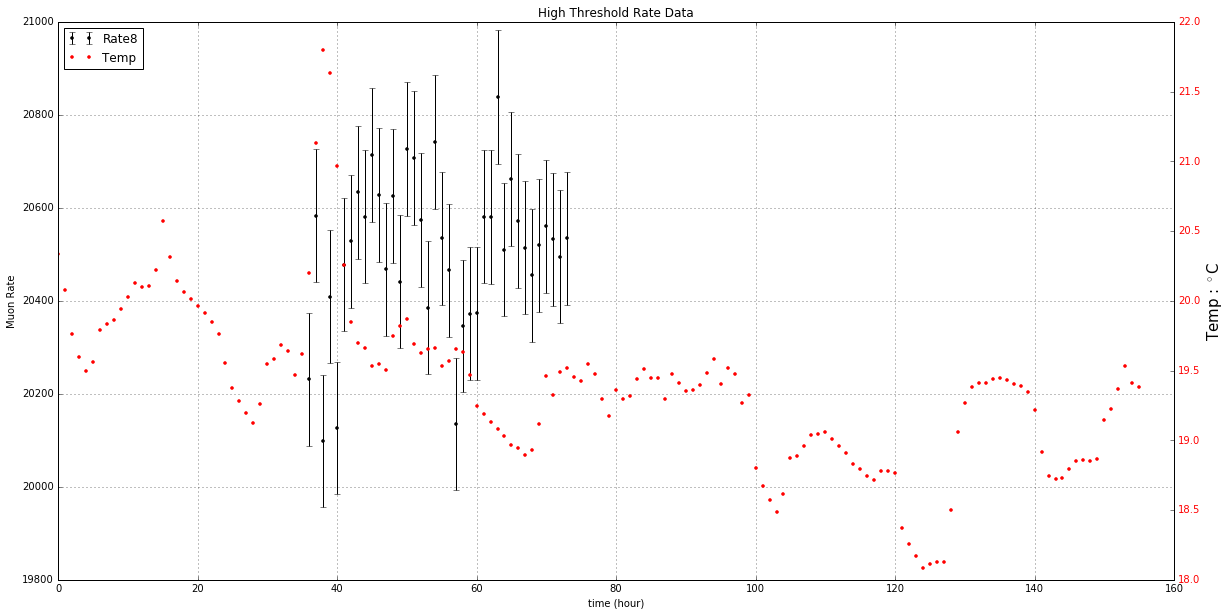

In [13]:
fig, ax1 = plt.subplots(figsize=(20,10))

ax1.errorbar(hour_time_8+36,binned_counts_8, fmt='k.',yerr=np.sqrt(binned_counts_8),label="Rate8")
ax1.set_xlabel('time (hour)')
# Make the y-axis label and tick labels match the line color.
ax1.set_ylabel('Muon Rate')
for tl in ax1.get_yticklabels():
    tl.set_color('k')
#ax1.set_xlim([50,100])
ax1.legend()
ax2 = ax1.twinx()
ax2.plot(total_hour, total_temp, 'r.',label='Temp')
ax2.set_ylabel('Temp '+r': $^\circ$'+'C',fontsize=15)
for tl in ax2.get_yticklabels():
    tl.set_color('r')
#ax2.set_xlim([50,100])
h1, l1 = ax1.get_legend_handles_labels()
h2, l2 = ax2.get_legend_handles_labels()
ax1.legend(h1+h2, l1+l2, loc=2)
ax1.grid()
plt.title('High Threshold Rate Data')

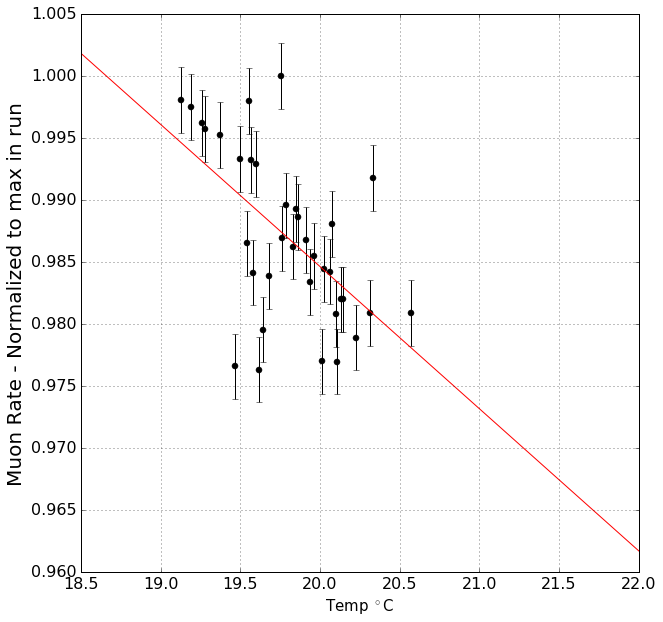

[[Model]]
    Model(linear)
[[Fit Statistics]]
    # function evals   = 8
    # data points      = 36
    # variables        = 2
    chi-square         = 159.161
    reduced chi-square = 4.681
[[Variables]]
    slope:      -0.01146847 +/- 0.002810 (24.50%) (init=-0.01150451)
    intercept:   1.21398909 +/- 0.055649 (4.58%) (init= 1.214734)
[[Correlations]] (unreported correlations are <  0.100)
    C(slope, intercept)          = -1.000 



In [27]:
def normalize(rate,err):
    return rate/max(rate),err/max(rate)


cor_counts,yerr1=normalize(binned_counts,np.sqrt(binned_counts))

from lmfit.models import LinearModel
cor_mod = LinearModel()
pars = cor_mod.guess(cor_counts,x=total_temp[:len(cor_counts)])
cor_counts_8,yerr8=normalize(binned_counts_8,np.sqrt(binned_counts_8))
out = cor_mod.fit(cor_counts,pars,x=total_temp[:len(cor_counts)],weights=1./yerr1)
x_mod=np.linspace(18.5,22)
y_mod=cor_mod.eval(out.params,x=x_mod)

plt.figure(figsize=(10,10))
plt.errorbar(total_temp[:len(cor_counts)],cor_counts,fmt='ko',yerr=yerr1)
#plt.errorbar(total_temp[36:36+len(cor_counts_8)],cor_counts_8,fmt='bo',yerr=yerr8)
plt.plot(x_mod,y_mod,'r-')
plt.xlabel('Temp'+r' $^\circ$'+'C',fontsize=15)
plt.ylabel('Muon Rate - Normalized to max in run',fontsize=fontSize)
#plt.title('Data Set One - Low Threshold',fontsize=fontSize)
plt.tick_params(axis='y', labelsize=fontSize-4)
plt.tick_params(axis='x', labelsize=fontSize-4)
plt.grid()
plt.show()

print(out.fit_report())


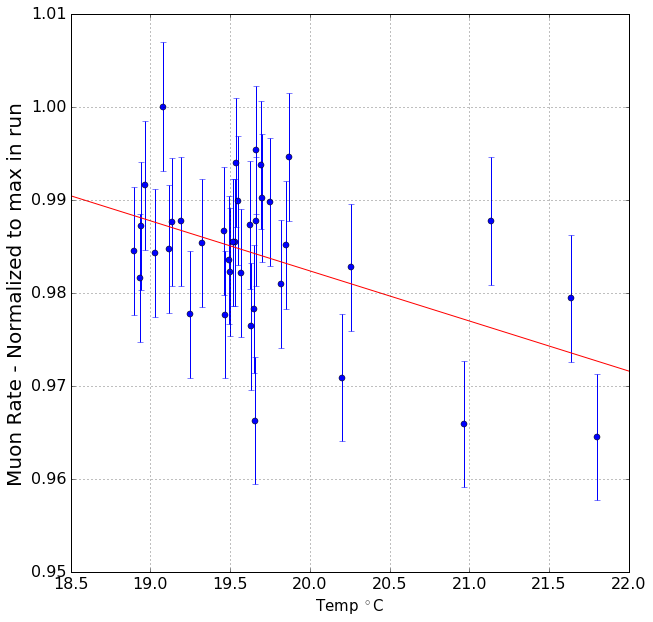

[[Model]]
    Model(linear)
[[Fit Statistics]]
    # function evals   = 8
    # data points      = 38
    # variables        = 2
    chi-square         = 39.562
    reduced chi-square = 1.099
[[Variables]]
    slope:      -0.00538398 +/- 0.001730 (32.13%) (init=-0.01150451)
    intercept:   1.09003645 +/- 0.034080 (3.13%) (init= 1.214734)
[[Correlations]] (unreported correlations are <  0.100)
    C(slope, intercept)          = -0.999 



In [26]:
pars = cor_mod.guess(cor_counts,x=total_temp[:len(cor_counts)])
cor_counts_8,yerr8=normalize(binned_counts_8,np.sqrt(binned_counts_8))
out = cor_mod.fit(cor_counts_8,pars,x=total_temp[36:36+len(cor_counts_8)],weights=1./yerr8)
x_mod=np.linspace(18.5,22)
y_mod=cor_mod.eval(out.params,x=x_mod)

plt.figure(figsize=(10,10))
#plt.errorbar(total_temp[:len(cor_counts)],cor_counts,fmt='ko',yerr=yerr1)
plt.errorbar(total_temp[36:36+len(cor_counts_8)],cor_counts_8,fmt='bo',yerr=yerr8)
plt.plot(x_mod,y_mod,'r-')
plt.xlabel('Temp'+r' $^\circ$'+'C',fontsize=15)
plt.ylabel('Muon Rate - Normalized to max in run',fontsize=fontSize)
#plt.title('Data Set Two - Higher Threshold',fontsize=fontSize)
plt.tick_params(axis='y', labelsize=fontSize-4)
plt.tick_params(axis='x', labelsize=fontSize-4)
plt.grid()
plt.show()

print(out.fit_report())


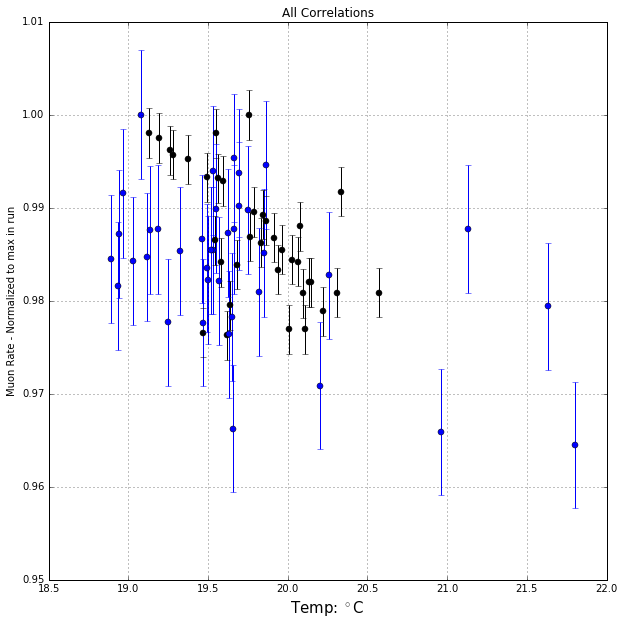

In [16]:
plt.figure(figsize=(10,10))
plt.errorbar(total_temp[:len(cor_counts)],cor_counts,fmt='ko',yerr=yerr1)
plt.errorbar(total_temp[36:36+len(cor_counts_8)],cor_counts_8,fmt='bo',yerr=yerr8)
#plt.plot(x_mod,y_mod,'r-')

plt.xlabel('Temp'+r': $^\circ$'+'C',fontsize=15)
plt.ylabel('Muon Rate - Normalized to max in run')
plt.title('All Correlations')

plt.grid()
plt.show()

In [17]:
with open("Data/binnedTemp.txt", "w") as text_file:
    text_file.write("#Hours\tTemp(C)\n")
    for i in range(len(total_temp)):
        text_file.write(str(i)+'\t'+str(total_temp[i])+'\n')